In [ ]:
import pandas as pd
data=pd.read_csv("/content/height.csv")
data

,height,weight
0,50,20
1,55,25
2,60,30
3,65,35
4,70,40
5,75,45
6,80,50
7,85,55
8,90,60
9,95,65


In [ ]:
X=data[['height']]
Y=data[['weight']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=33)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
import torch

X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
Y_train_tensor=torch.tensor(Y_train.values,dtype=torch.float32).view(-1,1)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
Y_test_tensor=torch.tensor(Y_test.values,dtype=torch.float32).view(-1,1)

In [ ]:
import torch.nn as nn
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1,8)
    self.fc2=nn.Linear(8,10)
    self.fc3=nn.Linear(10,1)
    self.relu=nn.ReLU()
    self.history={'loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
Loknaath_brain = NeuralNet()
criterion=nn.MSELoss()
optimizer=torch.optim.RMSprop(Loknaath_brain.parameters(),lr=0.001)

In [ ]:
def train_model(Loknaath_brain,X_train,y_train,criterion,optimizer,epochs=2000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss = criterion(Loknaath_brain(X_train),y_train)
    loss.backward()
    optimizer.step()

    Loknaath_brain.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")


In [ ]:
train_model(Loknaath_brain,X_train_tensor,Y_train_tensor,criterion,optimizer)

Epoch [0/2000], Loss: 4924.149414
Epoch [200/2000], Loss: 4173.096191
Epoch [400/2000], Loss: 2483.671631
Epoch [600/2000], Loss: 860.213806
Epoch [800/2000], Loss: 255.025146
Epoch [1000/2000], Loss: 188.695129
Epoch [1200/2000], Loss: 118.276657
Epoch [1400/2000], Loss: 49.575825
Epoch [1600/2000], Loss: 8.927639
Epoch [1800/2000], Loss: 0.130380


In [ ]:
with torch.no_grad():
  test_loss=criterion(Loknaath_brain(X_test_tensor),Y_test_tensor)
  print(f"Test loss: {test_loss.item():.6f}")

Test loss: 0.005138


Text(0, 0.5, 'Loss')

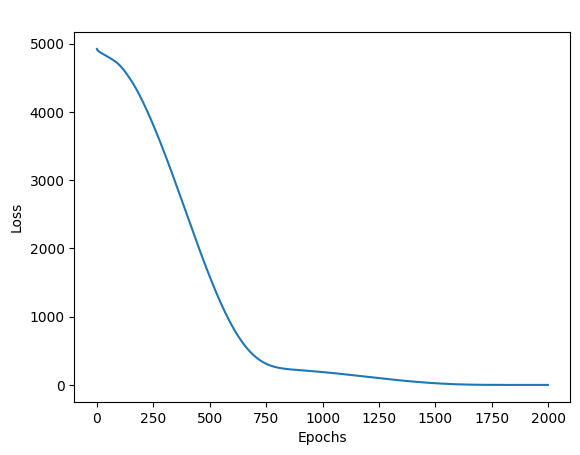

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Loknaath_brain.history['loss'])
plt.title(" ")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
X_n1_1 = torch.tensor([[50]], dtype=torch.float32)
prediction = Loknaath_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 20.18963050842285


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')